# Análisis Exploratorio de Datos (EDA) del Dataset Titanic

Este notebook está diseñado como guia a través de un análisis exploratorio de datos completo utilizando el dataset **"Titanic - Machine Learning from Disaster"** de Kaggle. Realizaremos un análisis detallado desde la comprensión inicial de los datos hasta la extracción de insights y generación de hipótesis. Utilizaremos bibliotecas populares como **Pandas**, **NumPy**, **Matplotlib**, **Seaborn** y **Scikit-learn**.


## **Índice**

1. [Configuración del Entorno](#1)
2. [EDA Level 0 — Comprensión de los Datos Originales](#2)
   - 2.1 [Carga de Datos](#2.1)
   - 2.2 [Inspección Inicial](#2.2)
   - 2.3 [Visualizaciones Básicas](#2.3)
3. [EDA Level 1 — Transformación de los Datos Originales](#3)
   - 3.1 [Limpieza de Datos](#3.1)
   - 3.2 [Manejo de Valores Atípicos (Outliers)](#3.2)
   - 3.3 [Transformaciones y Normalización](#3.3)
   - 3.4 [Ingeniería de Características](#3.4)
4. [EDA Level 2 — Comprensión de los Datos Transformados](#4)
   - 4.1 [Análisis Estadístico Descriptivo](#4.1)
   - 4.2 [Análisis Bivariado y Multivariado](#4.2)
   - 4.3 [Visualizaciones Avanzadas](#4.3)
5. [EDA Level 3 — Selección de Características y Reducción de Dimensionalidad](#5)
   - 5.1 [Selección de Características](#5.1)
   - 5.2 [Análisis de Componentes Principales (PCA)](#5.2)
6. [EDA Level 4 — Insights y Generación de Hipótesis](#6)
   - 6.1 [Identificación de Patrones Clave](#6.1)
   - 6.2 [Generación de Hipótesis](#6.2)
7. [Conclusiones](#7)

<a id="1"></a>
## 1. Configuración del Entorno

Importamos las bibliotecas necesarias y configuramos el entorno para nuestro análisis.

In [1]:
# Importar bibliotecas básicas
import numpy as np
import pandas as pd

# Para visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configuraciones adicionales
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
## 2. EDA Level 0 — Comprensión de los Datos Originales

### Objetivos:
- Cargar los datos en bruto.
- Entender el tamaño, tipos de datos, valores nulos y duplicados.
- Visualizaciones básicas de la estructura de los datos.

<a id="2.1"></a>
### 2.1 Carga de Datos

Importamos los datos desde los archivos CSV proporcionados.

In [26]:
# Cargar datos desde archivos CSV
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

# Verificar si los datos se cargaron correctamente
print("Datos de Entrenamiento")
train_df.head()


Datos de Entrenamiento


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Verificar si los datos de test se cargaron correctamente
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a id="2.2"></a>
### 2.2 Inspección Inicial

Analizamos la estructura básica del dataset.

In [28]:
# Dimensiones del dataset
print("Dimensiones del dataset de entrenamiento:", train_df.shape)

# Información sobre los tipos de datos
print("Información",train_df.info())

# Estadísticas descriptivas básicas
print("Descripción",train_df.describe())

# Dimensiones de los datos de entrenamiento
print("Dimensiones de los datos de entrenamiento",train_df.shape)


Dimensiones del dataset de entrenamiento: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Información None
Descripción        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0

- **Valores nulos**

In [29]:
# Comprobar valores nulos
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Duplicados**

In [30]:
# Contar duplicados
print("Número de filas duplicadas:", train_df.duplicated().sum())

Número de filas duplicadas: 0


<a id="2.3"></a>
### 2.3 Visualizaciones Básicas

- **Distribución de la variable objetivo ('Survived')**

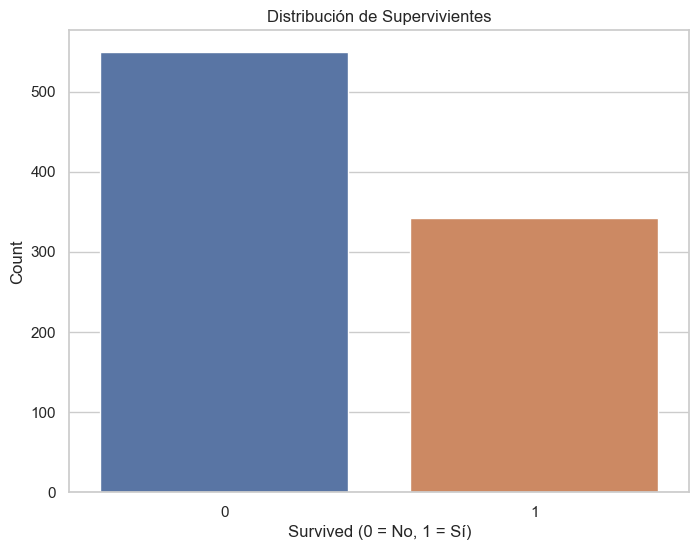

In [31]:
# Conteo de supervivientes y no supervivientes
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribución de Supervivientes')
plt.xlabel('Survived (0 = No, 1 = Sí)')
plt.ylabel('Count')
plt.show()

- **Distribución de variables numéricas**

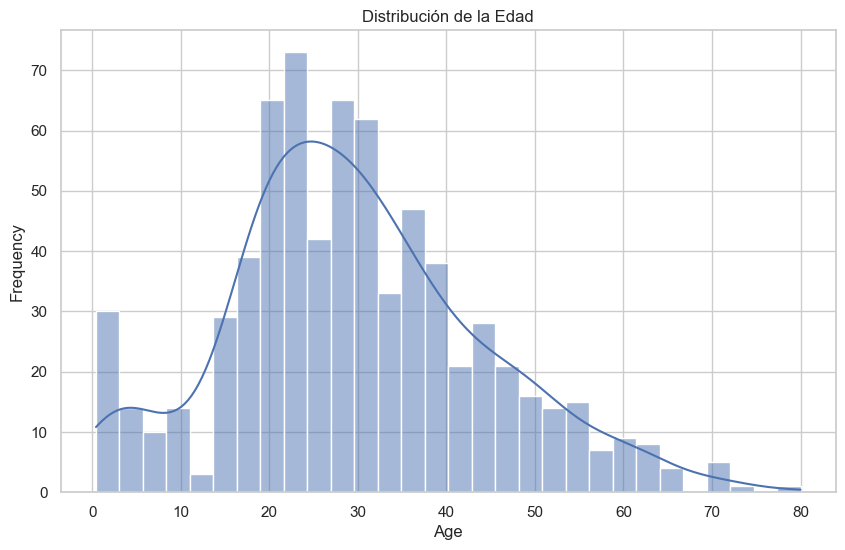

In [32]:
# Histograma de la edad
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- **Conteo de variables categóricas**

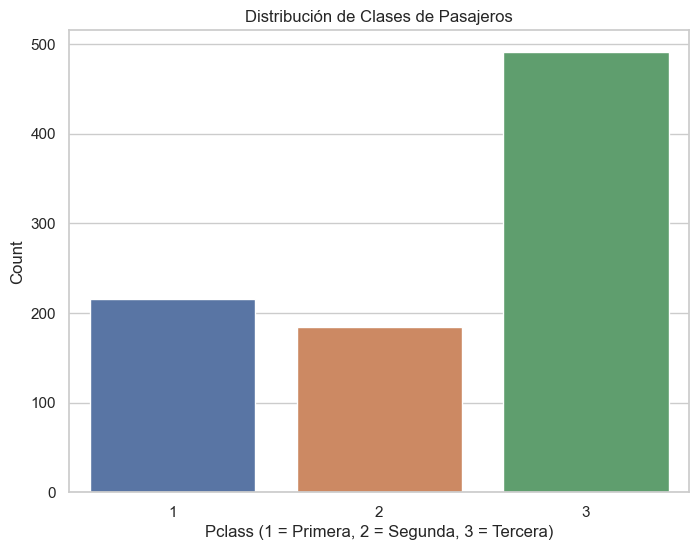

In [33]:
# Gráfico de barras para la clase de pasajero
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', data=train_df)
plt.title('Distribución de Clases de Pasajeros')
plt.xlabel('Pclass (1 = Primera, 2 = Segunda, 3 = Tercera)')
plt.ylabel('Count')
plt.show()

<a id="3"></a>
## 3. EDA Level 1 — Transformación de los Datos Originales

### Objetivos:
- Limpieza de datos y manejo de outliers.
- Transformaciones necesarias (escalado, normalización, imputación de valores faltantes).
- Aplicación de ingeniería de características.

<a id="3.1"></a>
### 3.1 Limpieza de Datos

- **Manejo de valores nulos**

In [9]:
# Verificar valores nulos por columna
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Imputación de valores faltantes en 'Age'**

Para imputar los valores nulos en la columna "Age", primero extraeremos el título social de cada persona de la columna "Name". Luego, realizaremos la imputación de los valores faltantes en la columna "Age" del DataFrame **train_df** mediante el uso de interpolación lineal y, en algunos casos, la media. Este proceso se lleva a cabo agrupando los datos según el título social de las personas (como "Mr", "Miss", "Mrs", "Master", etc.), imputando los valores de manera específica para cada grupo de personas con el mismo título.

In [39]:
# Función para extraer el título de un nombre
def extract_title(name):
    return name.split(",")[1].split(".")[0].strip()

# Aplicar la función a ambos DataFrames
train_df["Title"] = train_df["Name"].apply(extract_title)
test_df["Title"] = test_df["Name"].apply(extract_title)
print(train_df["Title"].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


*Análisis de los títulos* (Posiblemente):

- **Mr (517 registros)**: Título utilizado para hombres adultos. Indica que el pasajero es un hombre mayor de edad.
- **Miss (182 registros)**: Se refiere a mujeres solteras, generalmente jóvenes. Puede incluir desde niñas hasta mujeres adultas solteras.
- **Mrs (125 registros)**: Título para mujeres casadas. Indica que el pasajero es una mujer adulta.
- **Master (40 registros)**: Título utilizado para niños varones. Generalmente menores de 12 a 14 años.
- **Dr (7 registros)**: Indica que el pasajero tiene un título de doctorado. Probablemente adulto, puede ser hombre o mujer, aunque históricamente es más probable que sea hombre.
- **Rev (6 registros)**: Abreviatura de "Reverendo". Indica que el pasajero es un clérigo masculino adulto.
- **Mlle (2 registros)**: Abreviatura de "Mademoiselle", equivalente francés de "Miss". Mujer joven o soltera.
- **Mme (1 registro)**: Abreviatura de "Madame", equivalente francés de "Mrs". Mujer casada.
- **Ms (1 registro)**: Título femenino que puede referirse a una mujer independientemente de su estado civil. Sin embargo, en la época del Titanic, este título no era común, por lo que podría ser un error o variación de "Miss" o "Mrs".
- **Major (2 registros)**: Rango militar. Indica que el pasajero es un hombre adulto con rango de oficial.
- **Col (2 registros)**: Abreviatura de "Coronel". Rango militar alto, hombre adulto.
- **Capt (1 registro)**: Abreviatura de "Capitán". Puede referirse a un rango militar o marítimo. Hombre adulto.
- **Sir (1 registro)**: Título nobiliario británico. Indica un hombre de estatus social elevado.
- **Lady (1 registro)**: Título nobiliario femenino. Indica una mujer de estatus social elevado.
- **the Countess (1 registro)**: "La Condesa". Título nobiliario femenino de alto rango.
- **Don (1 registro)**: Título español de respeto, generalmente para hombres mayores o de alta posición social.
- **Jonkheer (1 registro)**: Título nobiliario neerlandés. Hombre de la nobleza.

**Relación con la edad**:

- **Master**: Generalmente niños varones menores de 12 a 14 años.
- **Miss/Mlle**: Pueden ser niñas o mujeres jóvenes solteras. La edad puede variar desde la infancia hasta la edad adulta temprana.
- **Mrs/Mme**: Mujeres adultas casadas, generalmente mayores de 18 años.
- **Mr**: Hombres adultos mayores de 18 años.
- **Títulos militares (Capt, Col, Major)**: Hombres adultos, probablemente de mediana edad debido al rango alcanzado.
- **Títulos nobiliarios (Sir, Lady, the Countess, Don, Jonkheer)**: Adultos de alto estatus social, la edad puede variar pero generalmente adultos maduros.

In [54]:
# Rellenar valores faltantes de edad en el dataset de train_df

# DataFrame Master
df_master = train_df[train_df["Title"] == "Master"]
# Interpolación
df_master.loc[:, "Age"] = df_master["Age"].interpolate(method = "linear")

# DataFrame Miss/Mlle
df_miss_mlle = train_df[train_df["Title"].isin(["Miss","Mlle"])]
# Interpolación
df_miss_mlle.loc[:, "Age"] = df_miss_mlle["Age"].interpolate(method = "linear")

# DataFrame Mrs/Mme
df_mrs_mme = train_df[train_df["Title"].isin(["Mrs","Mme"])]
# Interpolación
df_mrs_mme.loc[:, "Age"] = df_mrs_mme["Age"].interpolate(method = "linear")

# DataFrame Mr
df_mr = train_df[train_df["Title"]=="Mr"]
# Interpolación
df_mr.loc[:, "Age"] = df_mr["Age"].interpolate(method = "linear")

# DataFrame Cap/Col/Major
df_cap_col_major = train_df[train_df["Title"].isin(["Cap","Col","Major"])]
# Interpolación
df_cap_col_major.loc[:, "Age"] = df_cap_col_major["Age"].interpolate(method = "linear")

# DataFrame Otros
df_otros = train_df[train_df["Title"].isin(["Sir", "Lady", "the Countess", "Don", "Jonkheer"])]
# Interpolación
df_otros.loc[:, "Age"] = df_otros["Age"].interpolate(method = "linear")

# Juntar todos los DF
df_list = [df_master, df_miss_mlle, df_mrs_mme, df_mr, df_cap_col_major,df_otros ]
train_df = pd.concat(df_list, ignore_index = True)



# Rellenar valores faltantes de edad en el dataset de test_df
# DataFrame Master
df_master = test_df[test_df["Title"] == "Master"]
# Interpolación
df_master.loc[:, "Age"] = df_master["Age"].interpolate(method = "linear")

# DataFrame Miss/Mlle
df_miss_mlle = test_df[test_df["Title"].isin(["Miss","Mlle"])]
# Interpolación
df_miss_mlle.loc[:, "Age"] = df_miss_mlle["Age"].interpolate(method = "linear")

# DataFrame Mrs/Mme
df_mrs_mme = test_df[test_df["Title"].isin(["Mrs","Mme"])]
# Interpolación
df_mrs_mme.loc[:, "Age"] = df_mrs_mme["Age"].interpolate(method = "linear")

# DataFrame Mr
df_mr = test_df[test_df["Title"]=="Mr"]
# Interpolación
df_mr.loc[:, "Age"] = df_mr["Age"].interpolate(method = "linear")

# DataFrame Cap/Col/Major
df_cap_col_major = test_df[test_df["Title"].isin(["Cap","Col","Major"])]
# Interpolación
df_cap_col_major.loc[:, "Age"] = df_cap_col_major["Age"].interpolate(method = "linear")

# DataFrame Otros
df_otros = test_df[test_df["Title"].isin(["Sir", "Lady", "the Countess", "Don", "Jonkheer"])]
# Interpolación
df_otros.loc[:, "Age"] = df_otros["Age"].interpolate(method = "linear")

# Juntar todos los DF
df_list = [df_master, df_miss_mlle, df_mrs_mme, df_mr, df_cap_col_major,df_otros ]
test_df = pd.concat(df_list, ignore_index = True)


print(train_df["Title"].value_counts())
print(train_df.isnull().sum())
print(test_df["Title"].value_counts())
print(test_df.isnull().sum())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Mlle              2
Major             2
Col               2
Mme               1
Don               1
Lady              1
Sir               1
the Countess      1
Jonkheer          1
Name: count, dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          676
Embarked         2
Title            0
dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Name: count, dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          324
Embarked         0
Title            0
dtype: int64


- **Imputación de valores faltantes en 'Embarked'**

In [11]:
# Imputación de 'Embarked' con el valor más frecuente
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

- **Eliminación de la columna 'Cabin' debido a muchos valores faltantes**

In [12]:
# Eliminar la columna 'Cabin'
train_df.drop('Cabin', axis=1, inplace=True)

<a id="3.2"></a>
### 3.2 Manejo de Valores Atípicos (Outliers)

- **Detección de outliers en 'Fare' usando boxplots**

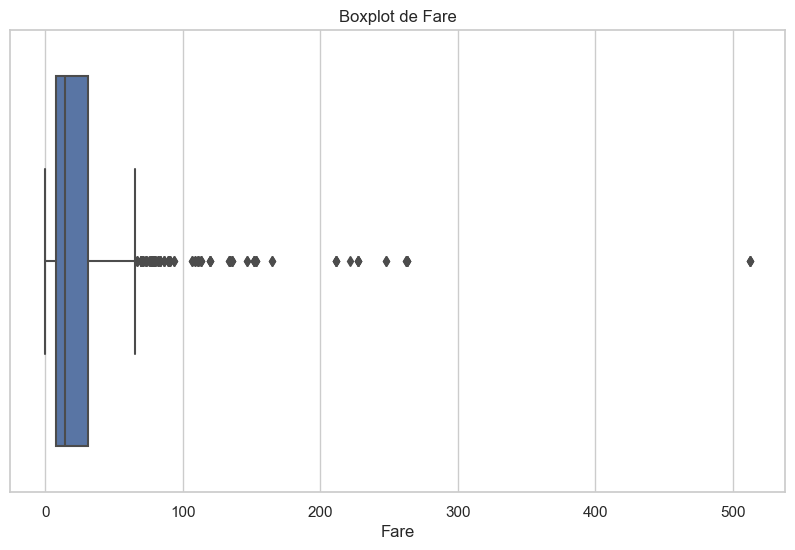

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train_df['Fare'])
plt.title('Boxplot de Fare')
plt.show()

- **Eliminación o tratamiento de outliers en 'Fare'**

In [14]:
# Aplicar logaritmo para reducir la asimetría
train_df['Fare'] = train_df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

<a id="3.3"></a>
### 3.3 Transformaciones y Normalización

- **Normalización de variables numéricas**

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])

<a id="3.4"></a>
### 3.4 Ingeniería de Características

- **Creación de nuevas características**

In [16]:
# Crear una nueva característica 'FamilySize'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Crear una nueva característica 'IsAlone'
train_df['IsAlone'] = 1  # Inicialmente todos están solos
train_df['IsAlone'].loc[train_df['FamilySize'] > 1] = 0  # Si el tamaño de familia es más de 1, no están solos

- **Extracción de títulos de los nombres**

In [17]:
# Extraer títulos
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Reemplazar títulos raros y agruparlos
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

- **Codificación categórica**

In [18]:
# Convertir variables categóricas en numéricas
categorical_features = ['Sex', 'Embarked', 'Title']
train_df = pd.get_dummies(train_df, columns=categorical_features)

<a id="4"></a>
## 4. EDA Level 2 — Comprensión de los Datos Transformados

### Objetivos:
- Análisis descriptivo y estadístico post-transformación.
- Correlaciones y análisis multivariante.
- Visualizaciones avanzadas.

<a id="4.1"></a>
### 4.1 Análisis Estadístico Descriptivo

In [19]:
# Estadísticas descriptivas después de la transformación
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000
mean,446.000000,0.383838,2.308642,2.272780e-16,4.386066e-17,5.382900e-17,-6.828308e-17,1.000000,0.740741
std,257.353842,0.486592,0.836071,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.683109,0.438474
min,1.000000,0.000000,1.000000,-2.224156e+00,-4.745452e-01,-4.736736e-01,-2.887102e+00,0.051781,0.000000
25%,223.500000,0.000000,2.000000,-5.657365e-01,-4.745452e-01,-4.736736e-01,-8.237453e-01,0.051781,0.000000
50%,446.000000,0.000000,3.000000,-1.046374e-01,-4.745452e-01,-4.736736e-01,-2.223418e-01,0.051781,1.000000
75%,668.500000,1.000000,3.000000,4.333115e-01,4.327934e-01,-4.736736e-01,5.388821e-01,1.293085,1.000000
max,891.000000,1.000000,3.000000,3.891554e+00,6.784163e+00,6.974147e+00,3.337325e+00,9.793097,1.000000


- **Distribución de 'Age' después de la imputación y normalización**

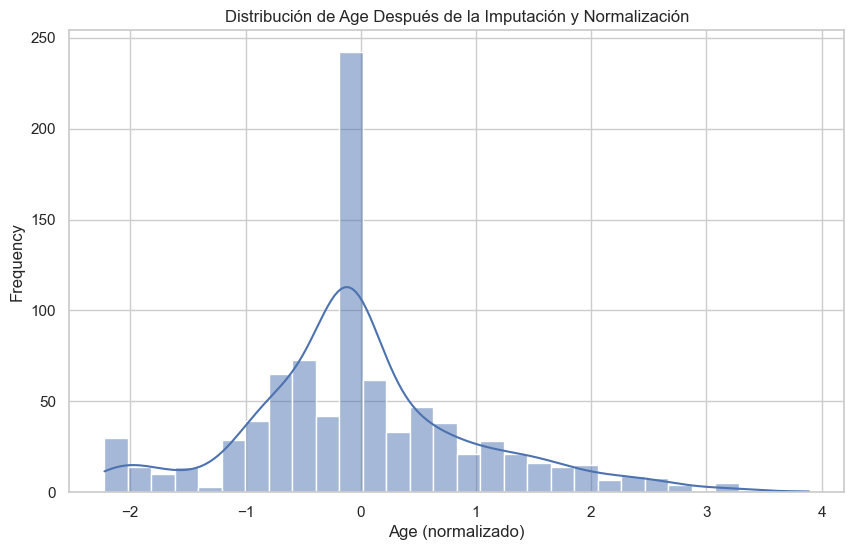

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribución de Age Después de la Imputación y Normalización')
plt.xlabel('Age (normalizado)')
plt.ylabel('Frequency')
plt.show()

<a id="4.2"></a>
### 4.2 Análisis Bivariado y Multivariado

- **Matriz de correlación**

In [21]:
plt.figure(figsize=(12,10))
correlation = train_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1200x1000 with 0 Axes>

- **Análisis de la correlación entre 'Survived' y 'Fare'**

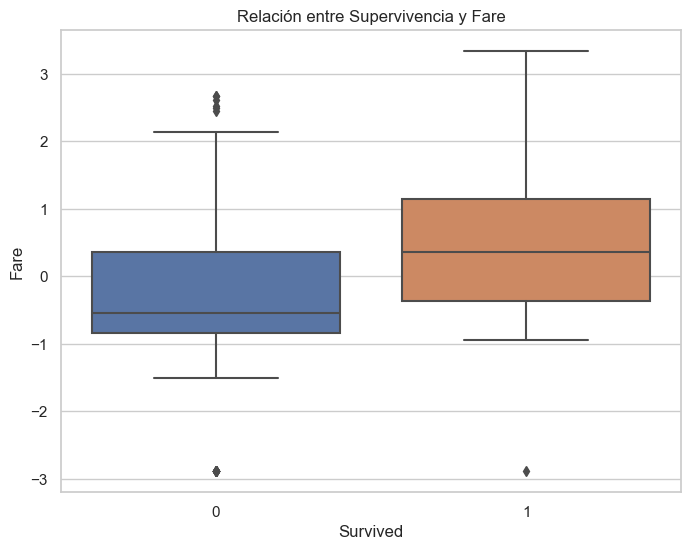

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Relación entre Supervivencia y Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

<a id="4.3"></a>
### 4.3 Visualizaciones Avanzadas

- **Pairplot de variables seleccionadas**

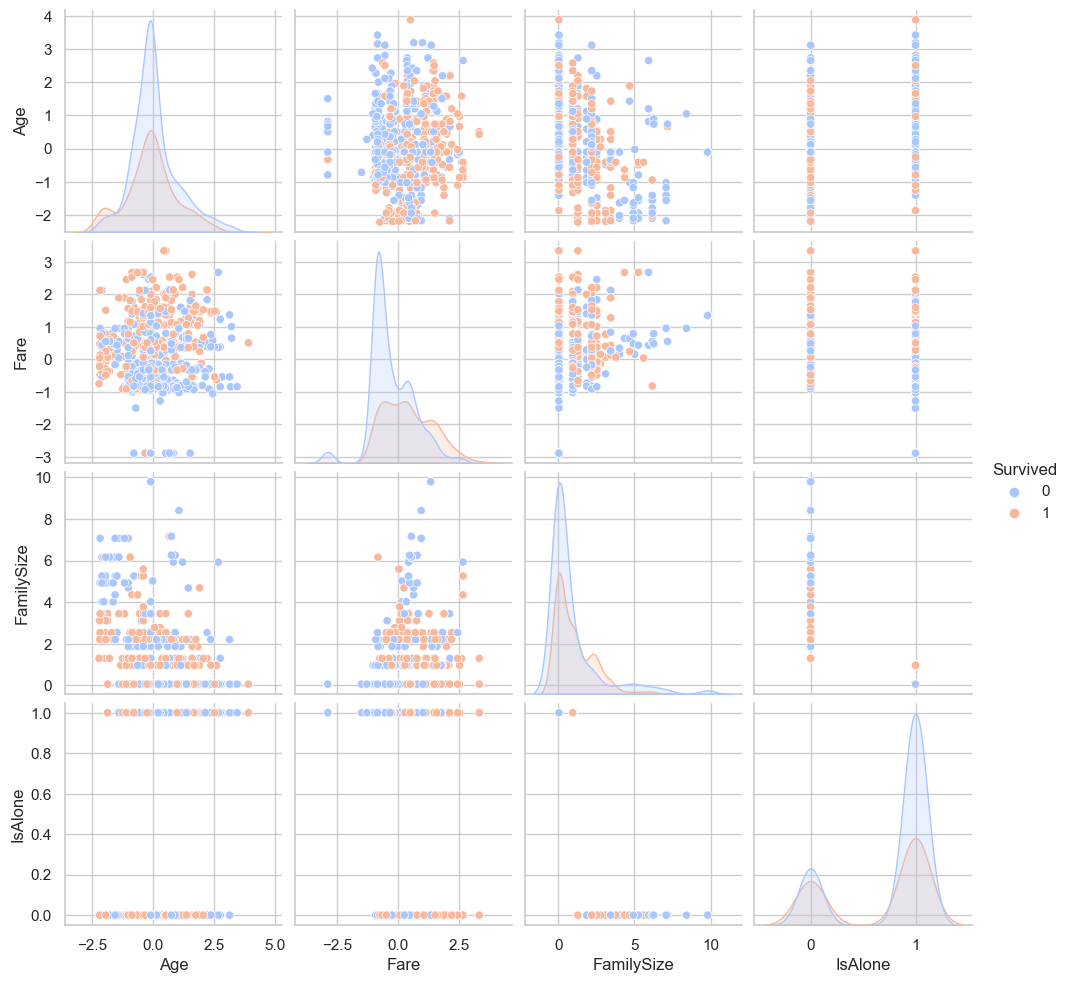

In [ ]:
features = ['Survived', 'Age', 'Fare', 'FamilySize', 'IsAlone']
sns.pairplot(train_df[features], hue='Survived', palette='coolwarm')
plt.show()

- **Gráfico de distribución conjunta**

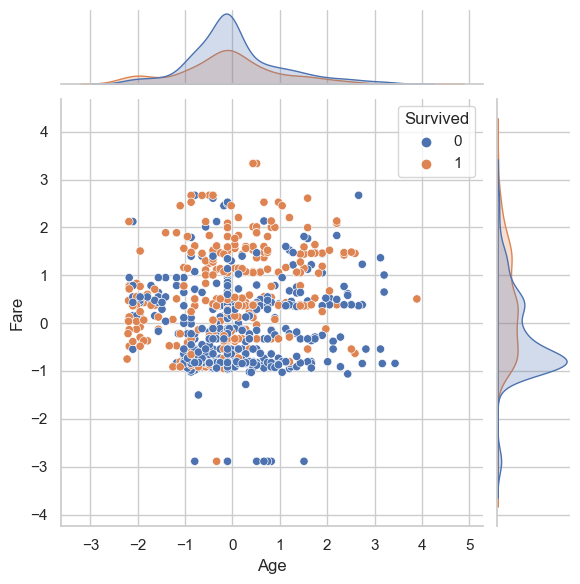

In [ ]:
sns.jointplot(x='Age', y='Fare', data=train_df, kind='scatter', hue='Survived')
plt.show()

<a id="5"></a>
## 5. EDA Level 3 — Selección de Características y Reducción de Dimensionalidad

### Objetivos:
- Seleccionar características clave.
- Aplicar técnicas de reducción de dimensionalidad como PCA.

<a id="5.1"></a>
### 5.1 Selección de Características

- **Importancia de características usando Random Forest**

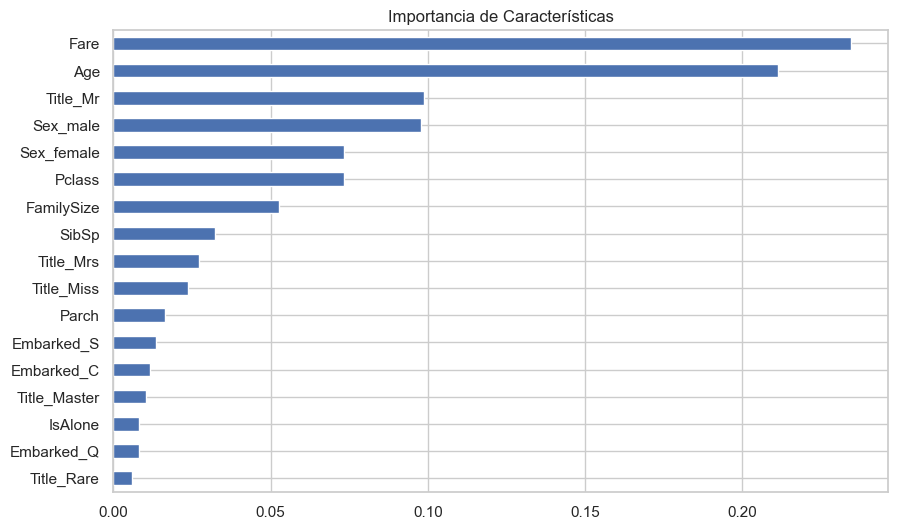

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definir variables predictoras y objetivo
X = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = train_df['Survived']

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener importancias
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Importancia de Características')
plt.show()

<a id="5.2"></a>
### 5.2 Análisis de Componentes Principales (PCA)

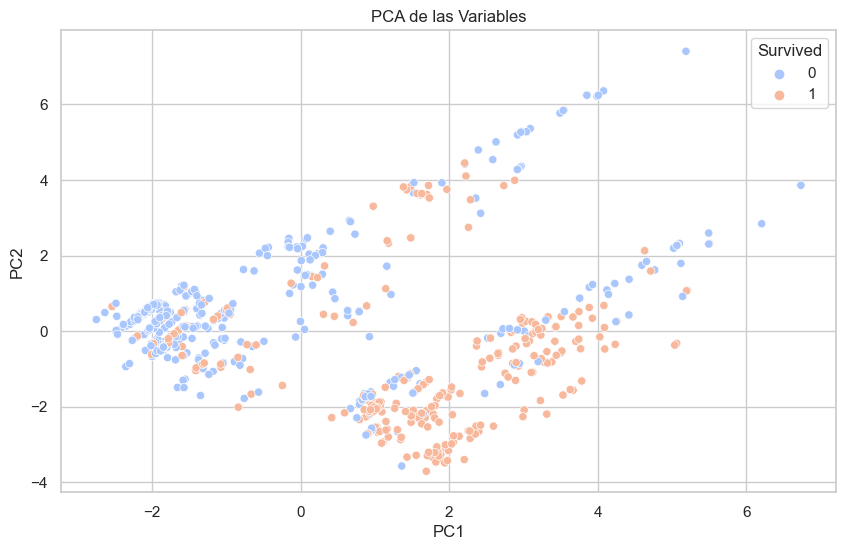

In [ ]:
from sklearn.decomposition import PCA

# Estandarizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Crear un dataframe con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca = pd.concat([df_pca, train_df[['Survived']].reset_index(drop=True)], axis=1)

# Visualizar los componentes principales
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Survived', data=df_pca, palette='coolwarm')
plt.title('PCA de las Variables')
plt.show()

<a id="6"></a>
## 6. EDA Level 4 — Insights y Generación de Hipótesis

### Objetivos:
- Identificar patrones clave en los datos.
- Generar hipótesis y extraer conclusiones accionables.

<a id="6.1"></a>
### 6.1 Identificación de Patrones Clave

- **Análisis de supervivencia por género**

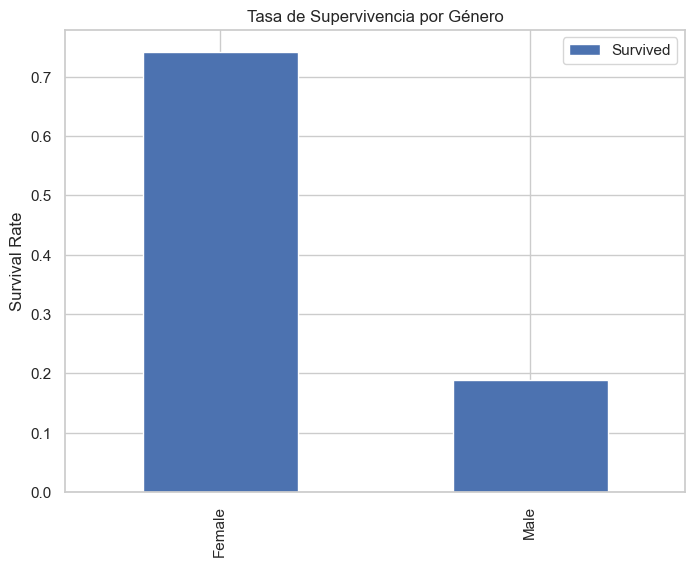

In [ ]:
# Porcentaje de supervivientes por género
gender_survival = train_df[['Sex_male', 'Survived']].groupby('Sex_male').mean()
gender_survival.index = ['Female', 'Male']
gender_survival.plot(kind='bar', figsize=(8,6))
plt.title('Tasa de Supervivencia por Género')
plt.ylabel('Survival Rate')
plt.show()

- **Análisis de supervivencia por clase**

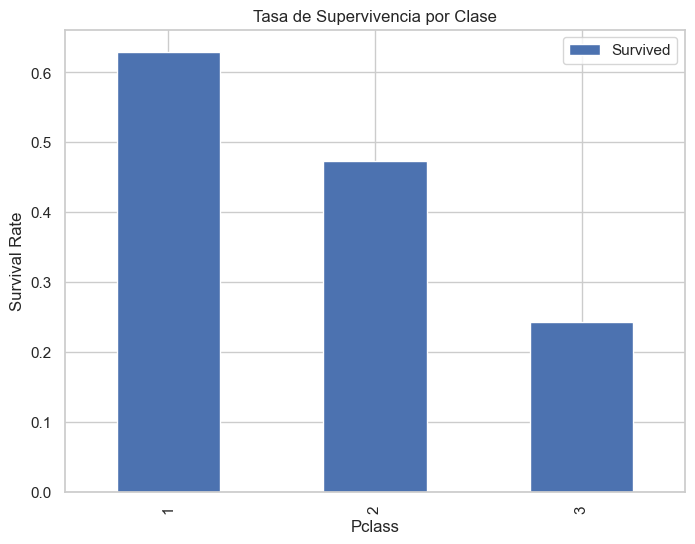

In [ ]:
# Porcentaje de supervivientes por clase
class_survival = train_df[['Pclass', 'Survived']].groupby('Pclass').mean()
class_survival.plot(kind='bar', figsize=(8,6))
plt.title('Tasa de Supervivencia por Clase')
plt.ylabel('Survival Rate')
plt.show()

<a id="6.2"></a>
### 6.2 Generación de Hipótesis

- **Hipótesis 1:** Las mujeres tienen una mayor probabilidad de supervivencia que los hombres.
- **Hipótesis 2:** Los pasajeros de primera clase tienen una mayor tasa de supervivencia que los de segunda y tercera clase.
- **Hipótesis 3:** Los pasajeros que viajan solos (IsAlone = 1) tienen una menor tasa de supervivencia.
- **Hipótesis 4:** La edad influye en la supervivencia, con los niños teniendo mayores tasas de supervivencia.

<a id="7"></a>
## 7. Conclusiones

- **Resumen de hallazgos:**
  - Se confirmó que el género y la clase del pasajero son factores importantes en la supervivencia.
  - La creación de nuevas características como 'FamilySize' y 'IsAlone' proporcionó insights adicionales.
  - La aplicación de PCA ayudó a visualizar la distribución de los datos en dos dimensiones.

- **Próximos pasos:**
  - Validar las hipótesis mediante modelos predictivos como regresión logística.
  - Optimizar el modelo utilizando técnicas de validación cruzada y ajuste de hiperparámetros.
  - Implementar estrategias basadas en los insights obtenidos, como priorizar ciertas características en el modelado.

---